<a href="https://colab.research.google.com/github/clustering-jun/KMU-Data_Science/blob/main/L04_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K Nearest Neighbors Practice**

## **Iris Dataset**
- 아이리스(붓꽃) 데이터
 - 붓꽃 종류별로 꽃받침과 꽃잎의 길이 및 너비를 측정한 데이터
 - Iris Setosa, Iris Versicolour, Iris Virginica

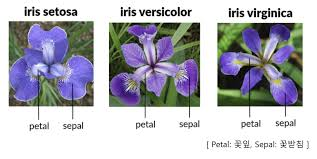

In [ ]:
!wget https://archive.ics.uci.edu/static/public/53/iris.zip
!unzip iris.zip

--2025-07-19 14:06:04--  https://archive.ics.uci.edu/static/public/53/iris.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘iris.zip’

iris.zip                [ <=>                ]   3.65K  --.-KB/s    in 0s      

2025-07-19 14:06:04 (566 MB/s) - ‘iris.zip’ saved [3738]

Archive:  iris.zip
  inflating: Index                   
  inflating: bezdekIris.data         
  inflating: iris.data               
  inflating: iris.names              


In [ ]:
!head iris.data

5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa
4.6,3.4,1.4,0.3,Iris-setosa
5.0,3.4,1.5,0.2,Iris-setosa
4.4,2.9,1.4,0.2,Iris-setosa
4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
import numpy as np

X = []
Y = []

for line in open('iris.data', 'r'):
        line = line.strip()
        if line == "": continue

        *x, y = line.split(',')
        x = [float(i) for i in x]

        # map함수 쓰거나 for문 써도 될 듯
        """
        for i in range(len(x)):
            x[i] = float(x[i])
            """

        X.append(x)
        Y.append(y)

        # raw = line.split(',')
        # x = raw[:4]
        # y = raw[4]

labels = list(set(Y))
Y = [labels.index(y) for y in Y]

X = np.array(X)
Y = np.array(Y)

In [ ]:
print(X)
print(Y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [ ]:
X[:,0]

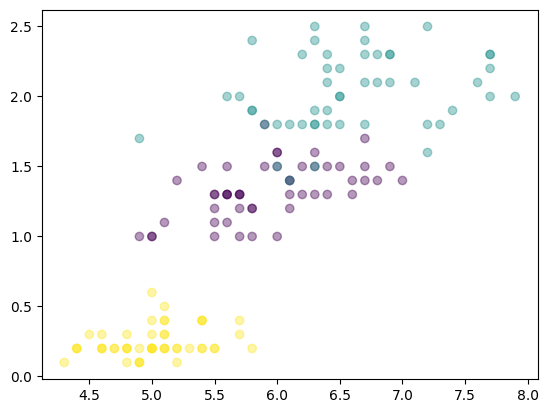

In [ ]:
import matplotlib.pyplot as plt

# X의 첫번째 차원과 두번째 차원만 뽑아서 scatter plot 찍기
# 숫자 바꿔가면서 plt 찍어보길

plt.scatter(X[:, 0], X[:,3], c=Y, alpha = 0.4)
plt.show()

## **KNN Classifier**
 - `np.linalg.norm`: norm 계산 (기본: l2 norm)
 - `np.argsort`: 정렬된 인덱스 계산 (numpy.partition)
 - `np.bincount`: 배열 원소별로 등장 횟수를 셈
 - `np.agrmax`: 배열에서 최댓값이 등장하는 인덱스 return

In [ ]:
class KNNClassifier:
    def __init__(self, k): # 생성자 함수 구현
        self.k = k


    def fit(self, X, Y):
        self.X = X
        self.Y = Y

    def predict(self, queries):
        Y = []
        for q in queries:
            dists = np.linalg.norm(self.X - q, axis = 1) # 각 raw별로 L2 norm 계산
            knns = np.argsort(dists)[:self.k] # dists에서 가장 가까운 k개의 인덱스 뽑음

            # k개 중 label count --> Iris Setosa, Iris Versicolour, Iris Virginica
            counts = np.bincount(self.Y[knns])

            Y.append(np.argmax(counts)) # count된 label의 인덱스를 뽑아서 Y에 추가 --> 1개  return

        return np.array(Y)

- code test

In [ ]:
q1 = X[0]
dists1 = np.linalg.norm(X - q1, axis=1)
dists1

array([0.        , 0.53851648, 0.50990195, 0.64807407, 0.14142136,
       0.6164414 , 0.51961524, 0.17320508, 0.92195445, 0.46904158,
       0.37416574, 0.37416574, 0.59160798, 0.99498744, 0.88317609,
       1.1045361 , 0.54772256, 0.1       , 0.74161985, 0.33166248,
       0.43588989, 0.3       , 0.64807407, 0.46904158, 0.59160798,
       0.54772256, 0.31622777, 0.14142136, 0.14142136, 0.53851648,
       0.53851648, 0.38729833, 0.6244998 , 0.80622577, 0.46904158,
       0.37416574, 0.41231056, 0.46904158, 0.8660254 , 0.14142136,
       0.17320508, 1.34907376, 0.76811457, 0.45825757, 0.6164414 ,
       0.59160798, 0.36055513, 0.58309519, 0.3       , 0.2236068 ,
       4.00374824, 3.61662826, 4.16413256, 3.09354166, 3.79209705,
       3.41613817, 3.78549865, 2.34520788, 3.74966665, 2.88790582,
       2.70370117, 3.22800248, 3.14642654, 3.7       , 2.58069758,
       3.62767143, 3.43511281, 3.00998339, 3.76828874, 2.88270706,
       3.85356977, 3.0757113 , 4.04722127, 3.65786823, 3.41613

In [ ]:
k = 5
knn1 = np.argsort(dists1)[:10]
Y[knn1]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### **Train data, Test data, Accuracy Measurement**

In [ ]:
Y # 섞어주자

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
np.random.permutation(10)

array([0, 7, 1, 4, 9, 8, 2, 3, 5, 6])

In [ ]:
mydata_X = np.array([00,11,22,33,44,55,66,77,88,99])
mydata_Y = np.array([9,8,7,6,5,4,3,2,1,0])
perm1 = np.random.permutation(10)

mydata_X[perm1]
mydata_Y[perm1]

array([1, 4, 8, 9, 0, 5, 2, 7, 3, 6])

## **Training data, Test data로 나눠서 성능확인**

In [ ]:
perm = np.random.permutation(len(X))

Xrand = X[perm]
Yrand = Y[perm]

n_trains = int(0.8 * len(X))

X_train = Xrand[:n_trains]
Y_train = Yrand[:n_trains]

X_test = Xrand[n_trains:]
Y_test = Yrand[n_trains:]

knn = KNNClassifier(5)
knn.fit(X_train, Y_train)

train_pred = knn.predict(X_train)
test_pred = knn.predict(X_test)

print('train_accuracy:', (train_pred == Y_train).mean())
print('test_accuracy:', (test_pred == Y_test).mean())

train_accuracy: 0.975
test_accuracy: 0.9666666666666667


## **Cross Validation으로 성능 확인**

In [ ]:
def cross_val_score(knn, X, Y, cv):
    n = len(X)
    perm = np.random.permutation(n)
    Xrand = X[perm]
    Yrand = Y[perm]

    scores = []

    for i in range(cv):
        start = i * n // cv
        end = (i+1) * n // cv

        X_train = np.concatenate([Xrand[:start], Xrand[end:]])
        Y_train = np.concatenate([Yrand[:start], Yrand[end:]])

        X_test = Xrand[start:end]
        Y_test = Yrand[start:end]

        knn.fit(X_train, Y_train)
        pred = knn.predict(X_test)

        scores.append((pred == Y_test).mean())

    return scores

In [ ]:
knn = KNNClassifier(5)
cross_val_score(knn, X, Y, 5)
print(np.mean(scores))

0.9733333333333334


## **최적의 k 찾기**
- k를 바꿔가며 cross validation score를 계산

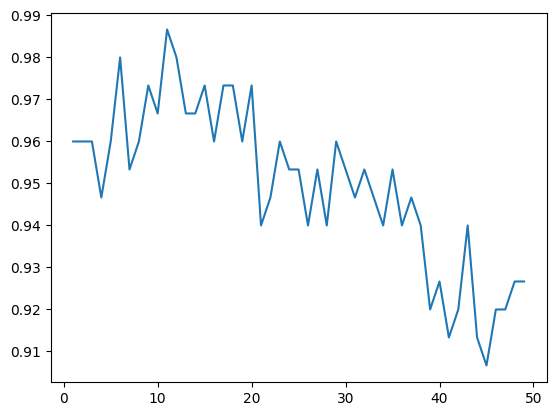

In [ ]:
scores = []
test_scores = []

for k in range(1, 50):
    knn = KNNClassifier(k)
    score = np.mean(cross_val_score(knn, X, Y, 5))
    scores.append(score)

plt.plot(range(1,50), scores)
plt.show()

## **KNN with Scikit-learn**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

print('train_accuracy:', accuracy_score(Y_train, y_train_pred))
print('test_accuracy:', accuracy_score(Y_test, y_test_pred))

train_accuracy: 0.975
test_accuracy: 1.0


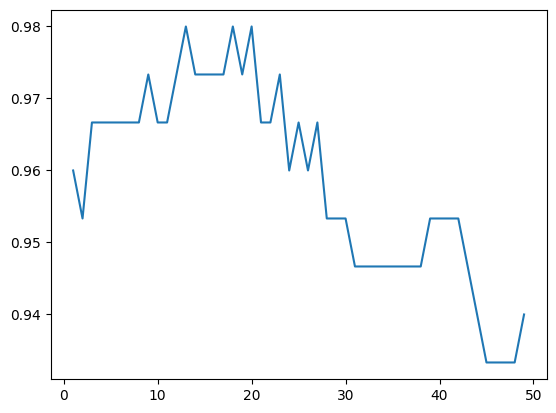

In [ ]:
from sklearn.model_selection import cross_val_score

scores = []

for k in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=k)
    score = np.mean(cross_val_score(knn, X, Y, cv=10, scoring='accuracy'))
    scores.append(score)

plt.plot(range(1,50), scores)
plt.show()